# 使用TensorFlow和Keras构建推荐系统

## 简介  

什么是推荐系统？  

在线服务通常提供数千、数百万甚至数十亿的项目，例如产品、视频剪辑、电影、音乐、新闻、文章、博客文章、广告等。例如，Google Play 商店提供数百万个应用程序，YouTube 提供数十亿个视频 。 

然而，用户更喜欢看到一些可能的项目的候选列表，而不是纠结于完整的语料库。 他们通常可以搜索或过滤列表以找到最好的几件物品，但有时他们甚至不知道自己真正想要什么（例如生日礼物）。 在实体店中，专业卖家会在这种情况下提供有用的建议来提供帮助。 那么，为什么不在网上商店呢？

推荐系统可以为用户检索、过滤和推荐最佳的个性化结果——用户可能购买的结果。 因此，提高转化率是现代企业的主要要求之一。 2009 年 9 月 21 日，Netflix 向一个团队颁发了 1,000,000 美元的大奖，该团队在预测收视率方面击败了 Netflix 自己的算法 10.06%。

推荐系统是一个提供查询（上下文）（即我们所了解的喜欢列表）的系统，并将语料库（项目的完整目录）过滤为候选列表（项目、文档）。 查询（上下文）可以是用户 ID、用户地理位置、用户先前购买历史等的组合，并且生成的候选可以是我们猜测用户感兴趣的一些新项目。

查询也可以是项目 ID、其图像、文本描述等的组合，候选可以是语料库中的一些相似或相关的项目。

<img src="imgs/r1.png" width=400/>

推荐阶段（任务）
在实践中，处理大型语料库并将其过滤到候选列表是一项棘手且低效的任务。 因此，实际的推荐系统有两个（或三个）过滤阶段：

1. 检索（候选生成）
1. 排名（评分）
1. 重新排名或优化或...

<img src="imgs/r2.png" width=400/>
<img src="imgs/r3.png" width=400/>

## 基于内容的过滤与协作过滤

过滤项目基于相似性。 我们可以根据相似的候选者（基于内容的过滤）或根据查询和候选者之间的相似性（协作过滤）来过滤列表。 协同过滤算法通常比基于内容的方法表现得更好。  

<img src="imgs/r4.png" width=400/>

##  查询或候选的表示

查询或候选具有许多不同的特征。 例如，可以通过以下功能构建查询：

1. 用户身份  
1. 用户上一个历史记录  
1. 用户工作  
ETC    

候选人可以具有以下特征：

1. 商品描述  
1. 项目图像  
1. 商品价格  
1. 发布时间  
ETC。  

这些显而易见的特征可以是数值变量、分类变量、位图或原始文本。 然而，这些低级特征不足以进行任何预测，我们应该从这些明显特征中提取一些更抽象的潜在特征，以将查询或候选表示为数字高维向量 - 称为嵌入向量。

矩阵分解（MF）是一种经典的协同过滤方法，从 user_id、item_id 和评级特征中学习一些潜在因素（潜在特征），并通过潜在（嵌入）向量表示用户和项目。

<img src="imgs/r5.png" width=400/>

矩阵分解方法仅协同使用 user_id 和 Candidate_id 特征来学习潜在特征。 事实上，它并不关心其他辅助功能，如候选人描述、价格、用户评论等。

为了在学习潜在特征（嵌入）时涉及辅助特征和 id，我们可以使用深度神经网络 (DNN) 架构，例如 softmax 或两塔神经模型。

<img src="imgs/r6.gif" width=400/>

YouTube 两塔神经模型使用侧面特征来表示抽象高维嵌入向量中的查询和候选。

<img src="imgs/r7.png" width=400/>

## Movielens dataset

Movielens 数据集是推荐系统研究领域的基准数据集，包含一组用户对电影的评分，这些评分是从 MovieLens 网站（电影推荐服务）收集的。

Movielens 有 5 种不同版本可用于不同用途：“25m”、“latest-small”、“100k”、“1m”和“20m”。 在本教程中，我们将使用“100k”版本。 有关不同版本的更多信息，请访问官方网站。

movielens/100k-ratings

MovieLens 数据集的最旧版本包含 943 位用户对 1,682 部电影的 100,000 个评分。 每个用户至少对 20 部电影进行了评分。 评级以全星递增。 除了电影和评分数据之外，该数据集还包含用户的人口统计数据。

movielens/100k-movies

该数据集包含 movielens/100k- ratings 数据集中评级的 1,682 部电影的数据。

## 使用TensorFlowDatasets构建数据输入管道

TensorFlow 数据集（TFDS 库）提供了一系列现成的数据集，可与 TensorFlow、Jax 和其他机器学习框架一起使用。

它确定性地下载和准备数据，并构建 tf.data.Dataset（或 np.array），以实现易于使用和高性能的输入管道。

pip install tensorflow-recommenders==0.6.0

pip install scann==1.2.6

In [1]:
import tensorflow_datasets as tfds

/home/heng/anaconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ratings_dataset, ratings_dataset_info = tfds.load(
    name='movielens/100k-ratings',
    data_dir='.',
    split='train',
    with_info=True,
    download=False
)

2023-10-30 17:49:53.091385: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 17:49:53.946475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10396 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-10-30 17:49:53.946907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10410 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


In [3]:
import tensorflow as tf

In [4]:
# Calling the `tfds.load()` function in old versions of TFDS won't return an
# instance of `tf.data.Dataset` type. So we can make sure about it.

assert isinstance(ratings_dataset, tf.data.Dataset)

print(
    "ratings_dataset size: %d" % ratings_dataset.__len__()
)

ratings_dataset size: 100000


In [5]:
import pandas

In [46]:
# Use `tfds.as_dataframe()` to convert `tf.data.Dataset` to `pandas.DataFrame`.
# Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to
# visualize images, audio, texts, videos, etc. `pandas.DataFrame` will load the
# full dataset in-memory, and can be very expensive to display. So use it only
# with take() function.

In [6]:
print(
    tfds.as_dataframe(ratings_dataset.take(5), ratings_dataset_info)
)

2023-10-30 17:49:54.218759: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


   bucketized_user_age movie_genres movie_id  \
0                 45.0          [7]   b'357'   
1                 25.0      [4, 14]   b'709'   
2                 18.0          [4]   b'412'   
3                 50.0       [5, 7]    b'56'   
4                 50.0     [10, 16]   b'895'   

                                 movie_title  raw_user_age  timestamp  \
0  b"One Flew Over the Cuckoo's Nest (1975)"          46.0  879024327   
1                b'Strictly Ballroom (1992)'          32.0  875654590   
2             b'Very Brady Sequel, A (1996)'          24.0  882075110   
3                     b'Pulp Fiction (1994)'          50.0  883326919   
4                         b'Scream 2 (1997)'          55.0  891409199   

   user_gender user_id  user_occupation_label user_occupation_text  \
0         True  b'138'                      4            b'doctor'   
1         True   b'92'                      5     b'entertainment'   
2         True  b'301'                     17           b'stud

In [7]:
ratings_dataset = ratings_dataset.map(
    lambda rating: {
        # `user_id` is useful as a user identifier.
        'user_id': rating['user_id'],
        # `movie_id` is useful as a movie identifier.
        'movie_id': rating['movie_id'],
        # `movie_title` is useful as a textual information about the movie.
        'movie_title': rating['movie_title'],
        # `user_rating` shows the user's level of interest to a movie.
        'user_rating': rating['user_rating'],
        # `timestamp` will allow us to model the effect of time.
        'timestamp': rating['timestamp']
    }
)


In [8]:
print(
    tfds.as_dataframe(ratings_dataset.take(5), ratings_dataset_info)
)

  movie_id                                movie_title  timestamp user_id  \
0   b'357'  b"One Flew Over the Cuckoo's Nest (1975)"  879024327  b'138'   
1   b'709'                b'Strictly Ballroom (1992)'  875654590   b'92'   
2   b'412'             b'Very Brady Sequel, A (1996)'  882075110  b'301'   
3    b'56'                     b'Pulp Fiction (1994)'  883326919   b'60'   
4   b'895'                         b'Scream 2 (1997)'  891409199  b'197'   

   user_rating  
0          4.0  
1          2.0  
2          4.0  
3          4.0  
4          3.0  


2023-10-30 17:49:54.567063: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [47]:
## Split dataset randomly (80% for train and 20% for test)

In [9]:
trainset_size = 0.8 * ratings_dataset.__len__().numpy()

In [10]:
tf.random.set_seed(42)

In [11]:
ratings_dataset_shuffled = ratings_dataset.shuffle(
    # the new dataset will be sampled from a buffer window of first `buffer_size`
    # elements of the dataset
    buffer_size=100_000,
    # set the random seed that will be used to create the distribution.
    seed=42,
    # `list(dataset.as_numpy_iterator()` yields different result for each call
    # Because reshuffle_each_iteration defaults to True.
    reshuffle_each_iteration=False
)

In [12]:
ratings_trainset = ratings_dataset_shuffled.take(trainset_size)
ratings_testset = ratings_dataset_shuffled.skip(trainset_size)

print(
    "ratings_trainset size: %d" % ratings_trainset.__len__()
)
print(
    "ratings_testset size: %d" % ratings_testset.__len__()
)

ratings_trainset size: 80000
ratings_testset size: 20000


## 预处理原始特征并使用 Keras 预处理层进行嵌入

原始特征通常不能立即在机器学习模型中使用，应该首先进行预处理。

1. 数值特征（评级、价格、时间戳等）在规模上可能相差很远，需要进行归一化，以便它们的值位于 0 附近的小区间内。  
1. 分类特征（id、用户名/电子邮件、标题等）通常是字符串特征，必须转换为嵌入向量（数字特征表示），并在模型训练期间进行调整。  
1. 文本特征（描述、评论等）首先需要被标记化（分成更小的部分，例如称为单词片段的单个单词），然后转换为嵌入。  

Keras 预处理层让我们能够构建接受原始特征（原始图像或原始结构化数据）作为输入的端到端可移植模型； 自行处理特征归一化或特征值索引的模型。

让我们首先看看我们可以使用 MovieLens 数据集中的哪些功能：

In [13]:
from pprint import pprint

for rating in ratings_trainset.take(1).as_numpy_iterator():
  pprint(rating)

{'movie_id': b'898',
 'movie_title': b'Postman, The (1997)',
 'timestamp': 885409515,
 'user_id': b'681',
 'user_rating': 4.0}


## 标准化数值特征  
时间戳值太大，无法直接在机器学习模型中使用。 但是，它可以在 0 左右的小区间内进行归一化。标准化（Z 分数归一化）是一种常见的预处理转换，它通过减去特征的均值并除以其标准差来重新缩放特征以归一化其范围。

In [14]:
# Make a Keras Normalization layer to standardize a numerical feature.
timestamp_normalization_layer = \
    tf.keras.layers.experimental.preprocessing.Normalization(axis=None)

# Normalization layer is a non-trainable layer and its state (mean and std of
# feature set) must be set before training in a step called "adaptation".
timestamp_normalization_layer.adapt(
    ratings_trainset.map(
        lambda x: x['timestamp']
    )
)

for rating in ratings_trainset.take(3).as_numpy_iterator():
  print(
      f"Raw timestamp: {rating['timestamp']} ->",
      f"Normalized timestamp: {timestamp_normalization_layer(rating['timestamp'])}"
  )

Raw timestamp: 885409515 -> Normalized timestamp: 0.3537561595439911
Raw timestamp: 883388887 -> Normalized timestamp: -0.02487170137465
Raw timestamp: 891249586 -> Normalized timestamp: 1.4480509757995605


## 将分类特征转化为嵌入数据
分类特征是一种不表达连续量，而是呈现一组固定值中的一个的特征。 大多数深度学习模型通过将这些特征转化为高维嵌入向量来表达这些特征，这些向量将在模型训练期间进行调整。

在这里，我们用嵌入向量表示每个用户和每部电影。 最初，这些嵌入将采用随机值，但在训练过程中，我们将调整它们，以便用户的嵌入和他们观看的电影最终更加接近。

获取原始分类特征并将其转化为嵌入通常是一个两步过程：

1. 构建一个映射（称为“词汇表”），将每个原始值（例如“Postman, The (1997)”）映射到唯一整数（例如 15）。  
1. 将这些整数转换为嵌入向量。

In [15]:
# Make a Keras StringLookup layer as the mapping (lookup)
user_id_lookup_layer = \
    tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)

# StringLookup layer is a non-trainable layer and its state (the vocabulary)
# must be constructed and set before training in a step called "adaptation".
user_id_lookup_layer.adapt(
    ratings_trainset.map(
        lambda x: x['user_id']
    )
)

print(
    f"Vocabulary[:10] -> {user_id_lookup_layer.get_vocabulary()[:10]}"
    # Vocabulary: ['[UNK]', '405', '655', '13', ...]
    # The vocabulary includes one (or more!) unknown (or "out of vocabulary", OOV)
    # tokens. So the layer can handle categorical values that are not in the
    # vocabulary and the model can continue to learn about and make
    # recommendations even using features that have not been seen during
    # vocabulary construction.
)

print(
    "Mapped integer for user ids: ['-2', '13', '655', 'xxx']\n",
    user_id_lookup_layer(
        ['-2', '13', '655', 'xxx']
    )
)

Vocabulary[:10] -> ['[UNK]', '405', '655', '13', '450', '276', '303', '416', '537', '234']
Mapped integer for user ids: ['-2', '13', '655', 'xxx']
 tf.Tensor([0 3 2 0], shape=(4,), dtype=int64)


In [16]:
user_id_embedding_dim = 32
# The larger it is, the higher the capacity of the model, but the slower it is
# to fit and serve and more prone to overfitting.

user_id_embedding_layer = tf.keras.layers.Embedding(
    # Size of the vocabulary
    input_dim=user_id_lookup_layer.vocab_size(),
    # Dimension of the dense embedding
    output_dim=user_id_embedding_dim
)
 
# A model that takes raw string feature values (user_id) in and yields embeddings
user_id_model = tf.keras.Sequential(
    [
        user_id_lookup_layer,
        user_id_embedding_layer
    ]
)
 
print(
    "Embeddings for user ids: ['-2', '13', '655', 'xxx']\n",
    user_id_model(
        ['-2', '13', '655', 'xxx']
    )
)

Embeddings for user ids: ['-2', '13', '655', 'xxx']
 tf.Tensor(
[[ 0.01645621 -0.00589932 -0.01471175 -0.00355174 -0.04663396  0.01846724
   0.02401174  0.03724445 -0.02736737 -0.02768031 -0.01896119  0.02223358
  -0.03668128  0.00480639  0.00746088  0.03996835 -0.04905364  0.00212307
   0.01345445 -0.03006717  0.02294225  0.00458346 -0.03924345  0.01767061
   0.01602763 -0.01630496  0.01014177 -0.02893742  0.03527372 -0.00593783
   0.04485276 -0.02624741]
 [ 0.04355587 -0.04048269 -0.04138212  0.01247839 -0.01294935  0.00139042
   0.01233207  0.03024682 -0.03334862 -0.02790955  0.01242272 -0.04128085
   0.04214266  0.04348017  0.01045523 -0.00205957 -0.03556986 -0.01739997
   0.04255753  0.02757342  0.0136765   0.01282351 -0.01459817 -0.00855327
  -0.03894869 -0.0358853  -0.03112409  0.01894793  0.02213276 -0.02511839
   0.00912381 -0.00024097]
 [ 0.00016055 -0.03171784 -0.03682018  0.01463613  0.04559476  0.01670735
  -0.01924447 -0.01310781 -0.0052641  -0.03164054  0.00288255  0.020

In [17]:
movie_id_lookup_layer = \
    tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)
movie_id_lookup_layer.adapt(
    ratings_trainset.map(
        lambda x: x['movie_id']
    )
)

# Same as user_id_embedding_dim to be able to measure the similarity
movie_id_embedding_dim = 32

movie_id_embedding_layer = tf.keras.layers.Embedding(
    input_dim=movie_id_lookup_layer.vocab_size(),
    output_dim=movie_id_embedding_dim
)
 
movie_id_model = tf.keras.Sequential(
    [
        movie_id_lookup_layer,
        movie_id_embedding_layer
    ]
)

print(
    f"Embedding for the movie 898:\n {movie_id_model('898')}"
)

Embedding for the movie 898:
 [-0.00188267 -0.01525087 -0.00824153 -0.04668652  0.005212   -0.02621797
  0.03498086 -0.03825183  0.02820224 -0.03877431  0.02133146 -0.0108206
  0.02659546 -0.00487442 -0.02332041 -0.02766312 -0.03729247 -0.02090429
 -0.02203454  0.00766915  0.03768411 -0.00749893 -0.03042971 -0.01427402
 -0.0393108  -0.04658396 -0.00478858  0.01963672 -0.04822909 -0.00989123
  0.02923337  0.02679086]


## 对文本特征进行标记并将其转换为嵌入
候选文本描述和用户评论可能非常有用，尤其是在冷启动或长尾场景中。

虽然 MovieLens 数据集没有为我们提供丰富的文本特征，但我们仍然可以使用电影标题。 这可能有助于我们认识到这样一个事实：标题非常相似的电影很可能属于同一个系列（例如《哈利·波特与魔法石》和《哈利·波特与密室》）。

In [18]:
# Keras TextVectorization layer transforms the raw texts into `word pieces` and
# map these pieces into tokens.
movie_title_vectorization_layer = \
    tf.keras.layers.experimental.preprocessing.TextVectorization()
movie_title_vectorization_layer.adapt(
    ratings_trainset.map(
        lambda rating: rating['movie_title']
    )
)

# Verify that the tokenization is done correctly
print(
    "Vocabulary[40:50] -> ",
    movie_title_vectorization_layer.get_vocabulary()[40:50]
)

print(
    "Vectorized title for 'Postman, The (1997)'\n",
    movie_title_vectorization_layer('Postman, The (1997)')
)

movie_title_embedding_dim = 32
movie_title_embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(movie_title_vectorization_layer.get_vocabulary()),
    output_dim=movie_title_embedding_dim,
    # Whether or not the input value 0 is a MASK token.
    # Keras TextVectorization layer builds the vocabulary with MASK token.
    mask_zero=True
)

movie_title_model = tf.keras.Sequential(
    [
       movie_title_vectorization_layer,
       movie_title_embedding_layer,
       # each title contains multiple words, so we will get multiple embeddings
       # for each title that should be compressed into a single embedding for
       # the text. Models like RNNs, Transformers or Attentions are useful here.
       # However, averaging all the words' embeddings together is also a good
       # starting point.
       tf.keras.layers.GlobalAveragePooling1D()
    ]
)

Vocabulary[40:50] ->  ['first', 'contact', '1971', '1977', 'monty', '1983', 'love', 'on', 'last', 'men']
Vectorized title for 'Postman, The (1997)'
 tf.Tensor([1120    2    4], shape=(3,), dtype=int64)


## 查询和候选表示
我们正在构建一个双塔检索模型，该模型包括两个单独的模型（塔），一个用于将查询原始特征转换为查询表示（查询塔），另一个用于将候选原始特征转换为相同维度的候选表示。

两个模型的输出张量将相乘（内积）以给出查询候选亲和力分数（相似性度量）。 分数越高表示候选者和查询之间的匹配越好。

In [19]:
# Query tower
query_model = user_id_model
 
# Candidate tower
candidate_model = movie_id_model

## 构建检索（候选生成）任务
它是关于从所有可能的候选人中选择数百名候选人的初始集合。 该模型的主要目标是有效地剔除用户不感兴趣的所有候选者。由于检索模型可能要处理数百万个候选者，因此它必须具有计算效率。

检索系统是一种从目录中预测用户可能观看的一组电影的模型。 因此，训练集应该表达用户观看了哪些电影，没有观看哪些电影。   

因此，我们将 Movielens 视为隐式反馈数据集，用户的手表会告诉我们他们喜欢看到哪些内容以及他们不想看到哪些内容。 这意味着用户评分（看过！）的每部电影，无论给定的评分如何，都是隐含的正例，而他们未评分（没看过！）的每部电影都是隐含的负例。

In [20]:
# We don't need rating field for the retrieval task
retrieval_ratings_trainset = ratings_trainset.map(
    lambda rating: {
        'user_id': rating['user_id'],
        'movie_id': rating['movie_id'],
    }
)
 
retrieval_ratings_testset = ratings_testset.map(
    lambda rating: {
        'user_id': rating['user_id'],
        'movie_id': rating['movie_id'],
    }
)

查询表示（查询嵌入向量）和候选表示（候选嵌入向量）（又名亲和力分数）之间的相似性可以通过点积（或其他相似性度量）来计算。 K-最近的候选者（具有较高亲和力分数的候选者）将被选入最终列表。

在我们的训练数据中，我们只有正（用户、电影）对。 为了弄清楚我们的模型有多好，我们需要将模型为该正对计算的亲和力分数与所有其他可能候选者的分数进行比较：如果正对的分数高于所有其他可能候选者的分数， 我们的模型非常准确。

为了衡量检索任务的性能，可以使用候选语料库的因式分解前 K 个分类准确性指标。 这些指标衡量模型从系统中所有可能的候选者中挑选出真正候选者的能力。

例如，前 5 名分类准确度指标为 0.2 将告诉我们，平均而言，真正的阳性在 20% 的时间内出现在前 5 个检索到的项目中。

In [21]:
movies_dataset, movies_dataset_info = tfds.load(
    name='movielens/100k-movies',
    data_dir='.',
    split='train',
    with_info=True,
    download=False
)

print(
    tfds.as_dataframe(movies_dataset.take(5), movies_dataset_info)
)
 
# We are using just `movie_id` feature for making the candidates representation
candidates_corpus_dataset = movies_dataset.map(
    lambda movie: movie['movie_id']
)

  movie_genres movie_id                      movie_title
0          [4]  b'1681'           b'You So Crazy (1994)'
1       [4, 7]  b'1457'   b'Love Is All There Is (1996)'
2       [1, 3]   b'500'          b'Fly Away Home (1996)'
3          [0]   b'838'  b'In the Line of Duty 2 (1987)'
4          [7]  b'1648'       b'Niagara, Niagara (1997)'


2023-10-30 17:55:21.284621: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


TensorFlow Recommenders (TFRS) 是一个有助于构建和评估灵活推荐模型的库。

它可以使用所有可能的候选嵌入的数据集通过 FactorizedTopK 指标计算分解的 top-k 分类准确性。

In [22]:
!pip install -q scann tensorflow-recommenders==0.6.0

In [23]:
import tensorflow_recommenders as tfrs

In [24]:
factorized_top_k_metrics = tfrs.metrics.FactorizedTopK(
    # dataset of candidate embeddings from which candidates should be retrieved
    candidates=candidates_corpus_dataset.batch(128).map(
        candidate_model
    )
)

TFRS 提出了一个名为 tfrs.tasks.Retrieval 的 Keras 层，它将查询和候选嵌入作为参数，并返回计算出的损失。

In [25]:
retrieval_task_layer = tfrs.tasks.Retrieval(
    metrics=factorized_top_k_metrics
)

## 创建训练循环
要创建适当的训练循环并训练模型，我们可以扩展 tf.keras.Model 类并覆盖 train_step 和 test_step 函数。 怎么看。

然而，为了将重点放在建模上并抽象出一些样板文件，TFRS 公开了 tfrs.models.Model 基类，它允许我们使用相同的方法计算训练和测试损失。 我们需要做的就是在 __init__ 方法中设置组件，并实现compute_loss方法，获取原始特征并返回损失值。 然后，基础模型将负责创建适当的训练循环以适应模型。

In [26]:
class RetrievalModel(tfrs.models.Model):
  """MovieLens candidate generation model"""
 
  def __init__(self, query_model, candidate_model, retrieval_task_layer):
    super().__init__()
    self.query_model: tf.keras.Model = query_model
    self.candidate_model: tf.keras.Model = candidate_model
    self.retrieval_task_layer: tf.keras.layers.Layer = retrieval_task_layer
 
 #def compute_loss(self, features: Dict[Text, tf.Tensor], training=False):
  def compute_loss(self, features, training=False) -> tf.Tensor:
    query_embeddings = self.query_model(features['user_id'])
    positive_candidate_embeddings = self.candidate_model(features["movie_id"])

    loss = self.retrieval_task_layer(
        query_embeddings,
        positive_candidate_embeddings
        # ,compute_metrics=not training  # To speed up training
    )
    return loss

使用标准 Keras 例程拟合模型

In [27]:
movielens_retrieval_model = RetrievalModel(
    query_model,
    candidate_model,
    retrieval_task_layer
)

optimizer_step_size = 0.1
movielens_retrieval_model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        learning_rate=optimizer_step_size
    )
)

In [48]:
# Shuffle the training data for each epoch.
# Batch and cache both the training and evaluation data.
# `cache()` method caches the elements in the dataset in memory. To caches data
# in a file pass the `filename` argument to the method: cache(filename='')
# The first time the dataset is iterated over, its elements will be cached
# either in the specified file or in memory. Subsequent iterations will use the
# cached data.

In [28]:
retrieval_cached_ratings_trainset = \
  retrieval_ratings_trainset.shuffle(100_000).batch(8192).cache()
retrieval_cached_ratings_testset = \
  retrieval_ratings_testset.batch(4096).cache()
 
num_epochs = 5 
history = movielens_retrieval_model.fit(
    retrieval_cached_ratings_trainset,
    validation_data=retrieval_cached_ratings_testset,
    validation_freq=1,
    epochs=num_epochs
)

Epoch 1/5
10/10 [==============================] - 8s 597ms/step - factorized_top_k/top_1_categorical_accuracy: 6.2500e-05 - factorized_top_k/top_5_categorical_accuracy: 0.0014 - factorized_top_k/top_10_categorical_accuracy: 0.0039 - factorized_top_k/top_50_categorical_accuracy: 0.0474 - factorized_top_k/top_100_categorical_accuracy: 0.1129 - loss: 69844.1094 - regularization_loss: 0.0000e+00 - total_loss: 69844.1094 - val_factorized_top_k/top_1_categorical_accuracy: 0.0025 - val_factorized_top_k/top_5_categorical_accuracy: 0.0148 - val_factorized_top_k/top_10_categorical_accuracy: 0.0322 - val_factorized_top_k/top_50_categorical_accuracy: 0.1550 - val_factorized_top_k/top_100_categorical_accuracy: 0.2718 - val_loss: 28808.9141 - val_regularization_loss: 0.0000e+00 - val_total_loss: 28808.9141
Epoch 2/5
10/10 [==============================] - 5s 465ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0010 - factorized_top_k/top_5_categorical_accuracy: 0.0117 - factorized_top_k/top

Factorized_top_k/top_10_categorical_accuracy: 0.0538 告诉我们，平均而言，真正的正例有 5% 的概率出现在整个候选集中检索到的前 10 个项目中。

如果候选集是一个大集，请在训练中关闭度量计算，仅在评估中运行它。 因为这可能会很慢！

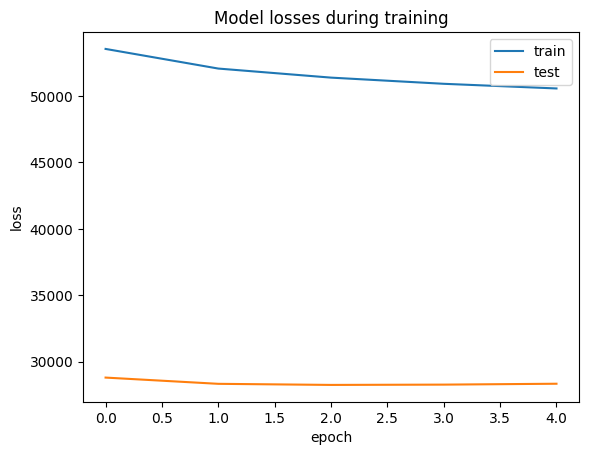

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()

正如我们所看到的，该模型在训练数据集上过度拟合。 它非常适合训练数据，因为它记住了它们。 然而，训练数据的表现并不重要。 该模型应该能够推广到新的未见过的数据。

当模型参数较多时，过拟合现象尤其严重。 它可以通过模型正则化以及用户和电影特征的使用来调节，从而帮助模型更好地推广到未见过的数据。

此外，该模型正在重新推荐一些用户已经看过的电影。 这些已知的阳性手表可能会从前 K 个推荐中挤出测试电影，并降低测试数据的模型准确性。 这可以通过在第三阶段从测试推荐中排除以前看过的电影来解决。 这种方法在推荐系统文献中相对常见，但我们在这些教程中不遵循它。 如果不推荐过去的手表很重要，那么我们应该期望适当指定的模型能够从过去的用户历史记录和上下文信息中自动学习这种行为。 此外，多次推荐同一商品（例如，常青电视剧或经常购买的商品）通常是合适的。

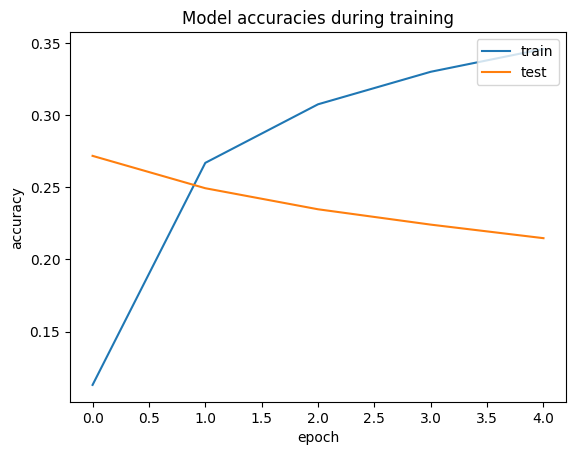

In [30]:
# Plot changes in model accuracy during training
plt.plot(history.history["factorized_top_k/top_100_categorical_accuracy"])
plt.plot(history.history["val_factorized_top_k/top_100_categorical_accuracy"])
plt.title("Model accuracies during training")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc="upper right")
plt.show()

## 做出预测
为了做出推荐，首先，我们必须找到语料库中所有候选者的表示嵌入向量，并将它们全部索引以供将来检索。

然后，我们可以获得一个查询，将其传递到查询塔并找到其表示嵌入向量。

最后，我们可以计算查询和所有候选者之间的亲和力分数，对它们进行排序并找到与查询最近的 k 个候选者。 这称为暴力搜索，TFRS 公开了一个名为 tfrs.layers.factorized_top_k.BruteForce 的层来执行此操作。

In [31]:
brute_force_layer = tfrs.layers.factorized_top_k.BruteForce(
    movielens_retrieval_model.query_model
)

brute_force_layer.index_from_dataset(
  tf.data.Dataset.zip(
      (
          candidates_corpus_dataset.batch(100),
          candidates_corpus_dataset.batch(100).map(
              movielens_retrieval_model.candidate_model
          )
      )
  )
)

In [32]:
user_id = '42'
afinity_scores, movie_ids = brute_force_layer(
    tf.constant([user_id])
)

print(f"Recommendations for user {user_id} using BruteForce: {movie_ids[0, :5]}")

Recommendations for user 42 using BruteForce: [b'468' b'1043' b'560' b'944' b'140']


In [33]:
import tensorflow_recommenders as tfrs

在生产环境中，在大型语料库中执行强力搜索可能会太慢且不切实际。 在实践中，我们可以通过使用近似最近邻搜索而不是强力搜索来加快速度。 近似最近邻 (ANN) 搜索可以大大超越暴力搜索速度，同时在准确性方面几乎没有牺牲。

我们可以使用Google ScaNN、Facebook Faiss、Spotify Annoy或其他近似向量相似度搜索库来构建近似检索索引。 然而，TFRS 使用 ScaNN 库并公开 tfrs.layers.factorized_top_k.ScaNN 层，让我们使模型真正实现端到端。

注意：要使用 tfrs.layers.factorized_top_k.ScaNN 层，应在导入 TFRS 库之前使用 pip install scann 安装 ScaNN 库。

In [34]:
scann_layer = tfrs.layers.factorized_top_k.ScaNN(
    movielens_retrieval_model.query_model
)

scann_layer.index_from_dataset(
  tf.data.Dataset.zip(
      (
          candidates_corpus_dataset.batch(100),
          candidates_corpus_dataset.batch(100).map(
              movielens_retrieval_model.candidate_model
          )
      )
  )
)

user_id = '42'
afinity_scores, movie_ids = scann_layer(
    tf.constant([user_id])
)

print(f"Recommendations for user {user_id} using ScaNN: {movie_ids[0, :5]}")

Recommendations for user 42 using ScaNN: [b'468' b'966' b'1043' b'1221' b'560']


[libprotobuf WARNING external/com_google_protobuf/src/google/protobuf/text_format.cc:339] Warning parsing text-format research_scann.ScannConfig: 43:11: text format contains deprecated field "min_cluster_size"
2023-10-30 17:55:50.283283: I scann/partitioning/partitioner_factory_base.cc:71] Size of sampled dataset for training partition: 1682
2023-10-30 17:55:50.286852: I ./scann/partitioning/kmeans_tree_partitioner_utils.h:102] PartitionerFactory ran in 3.535356ms.


In [35]:
import os
import tempfile

with tempfile.TemporaryDirectory() as tmp_dir:
  retrieval_model_path = os.path.join(tmp_dir, "retrieval_model")


scann_layer.save(
    retrieval_model_path,
    options=tf.saved_model.SaveOptions(namespace_whitelist=["Scann"])
)

2023-10-30 18:45:18.564477: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [40]:
scann_layer.save(
    'retrieval_model',
    options=tf.saved_model.SaveOptions(namespace_whitelist=["Scann"])
)

In [37]:
retrieval_model_path

'/tmp/tmpyb44onww/retrieval_model'

## 构建排名（评分）任务
排名模型采用检索模型的输出并对它们进行微调以选择尽可能最好的推荐。  

它的任务是将用户可能感兴趣的项目集缩小到可能的候选者的候选名单。 因此训练集应该表达用户对他们观看的电影的喜爱程度。 这是一种明确的反馈形式——假设用户观看了一部电影，我们可以通过查看他们给出的评分来大致了解他们的喜欢程度。

这次我们将以预测 user_ rating 值作为目标。 因此，与其他回归问题一样，我们可以使用 MSE（均方误差）作为损失函数，使用 RMSE（均方根误差）作为精度指标。 MovieLens/100k 的最新 (SOTA) RMSE 值等于 0.909。

tfrs.tasks.Ranking 层获取预测评分和真实情况作为输入，计算指标并返回损失值。

排名模型不会面临与检索模型相同的效率限制，因此我们在选择架构方面有更多的自由度。 由多个堆叠的 Dense 层组成的模型是排序任务中相对常见的架构。

在大多数情况下，可以通过使用更多特征而不仅仅是用户和候选标识符来显着改进排名模型。

In [42]:
class RankingModel(tfrs.models.Model):
  """MovieLens ranking model"""

  def __init__(self, query_model, candidate_model):
    super().__init__()

    self.query_model: tf.keras.Model = query_model
    self.candidate_model: tf.keras.Model = candidate_model
    self.rating_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
        ]
    )
    self.ranking_task_layer: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.RootMeanSquaredError()
        ]
    )


  def compute_loss(self, features, training=False) -> tf.Tensor:
    query_embeddings = self.query_model(features['user_id'])
    candidate_embeddings = self.candidate_model(features["movie_id"])
    rating_predictions = self.rating_model(
        tf.concat(
            [query_embeddings, candidate_embeddings],
            axis=1
        )
        # We could use `tf.keras.layers.Concatenate(axis=1)([x, y])`
    )

    loss = self.ranking_task_layer(
        predictions=rating_predictions,
        labels=features["user_rating"]
    )
    return loss

拟合排名模型

In [43]:
movielens_ranking_model = RankingModel(query_model, candidate_model)

optimizer_step_size = 0.1
movielens_ranking_model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        learning_rate=optimizer_step_size
    )
)

In [44]:
ranking_ratings_trainset = ratings_trainset.shuffle(100_000).batch(8192).cache()
ranking_ratings_testset = ratings_testset.batch(4096).cache()

history = movielens_ranking_model.fit(
    ranking_ratings_trainset,
    validation_data=ranking_ratings_testset,
    validation_freq=1,
    epochs=5
)

Epoch 1/5
10/10 [==============================] - 2s 116ms/step - root_mean_squared_error: 2.0617 - loss: 3.9534 - regularization_loss: 0.0000e+00 - total_loss: 3.9534 - val_root_mean_squared_error: 1.4453 - val_loss: 2.0769 - val_regularization_loss: 0.0000e+00 - val_total_loss: 2.0769
Epoch 2/5
10/10 [==============================] - 0s 9ms/step - root_mean_squared_error: 1.2029 - loss: 1.4181 - regularization_loss: 0.0000e+00 - total_loss: 1.4181 - val_root_mean_squared_error: 1.0984 - val_loss: 1.1869 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.1869
Epoch 3/5
10/10 [==============================] - 0s 9ms/step - root_mean_squared_error: 1.0575 - loss: 1.1127 - regularization_loss: 0.0000e+00 - total_loss: 1.1127 - val_root_mean_squared_error: 1.0263 - val_loss: 1.0297 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.0297
Epoch 4/5
10/10 [==============================] - 0s 10ms/step - root_mean_squared_error: 1.0197 - loss: 1.0382 - regularization_loss: 0

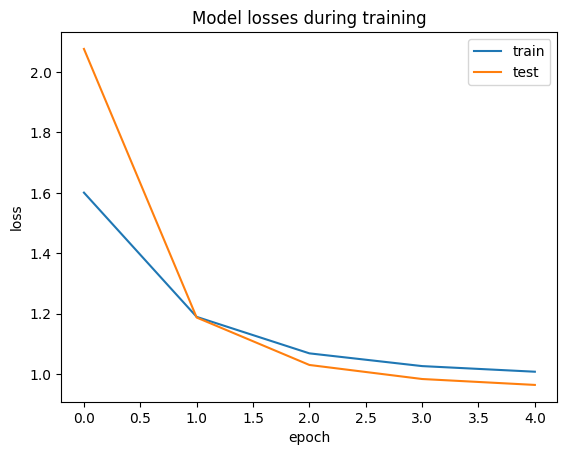

In [45]:
# Plot changes in model loss during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()

## 参考

1. [Side Features](https://www.tensorflow.org/recommenders/examples/featurization)

2. [Context Features](https://www.tensorflow.org/recommenders/examples/context_features)

3. [Deep Recommenders](https://www.tensorflow.org/recommenders/examples/deep_recommenders)

4. [Multi-task Recommenders](https://www.tensorflow.org/recommenders/examples/multitask)

5. [DCN](https://www.tensorflow.org/recommenders/examples/dcn)

1. [Two-tower neural network](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/6c8a86c981a62b0126a11896b7f6ae0dae4c3566.pdf) 

1. [SOTA](https://arxiv.org/pdf/1905.01395v1.pdf)

1. [SSL](https://arxiv.org/abs/2007.12865)

1. [Multi-task](http://www.jiaqima.com/papers/SNR.pdf)

1. [Google](https://colab.research.google.com/github/xei/recommender-system-tutorial/blob/main/recommender_system_tutorial.ipynb#scrollTo=Haid763z4PL2)